In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
sns.set(style="whitegrid")

In [42]:
# Load dataset
df_data = pd.read_csv("data/iris_data.csv")
df_data_copy = df_data.copy()
target = df_data_copy['species']
df_data_copy = df_data_copy.drop(['species'], axis=1)

In [43]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df_data_copy.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [47]:
df_data_copy.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [48]:
df_data_copy.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [49]:
df_data_copy.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [50]:
sm.robust.scale.mad(df_data_copy)

array([1.03782155, 0.44478067, 1.85325277, 1.03782155])

In [51]:
sp.stats.median_abs_deviation(df_data_copy)

array([0.7 , 0.3 , 1.25, 0.7 ])

In [52]:
df_data_copy.quantile(0.75) - df_data_copy.quantile(0.25)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64

c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  pos

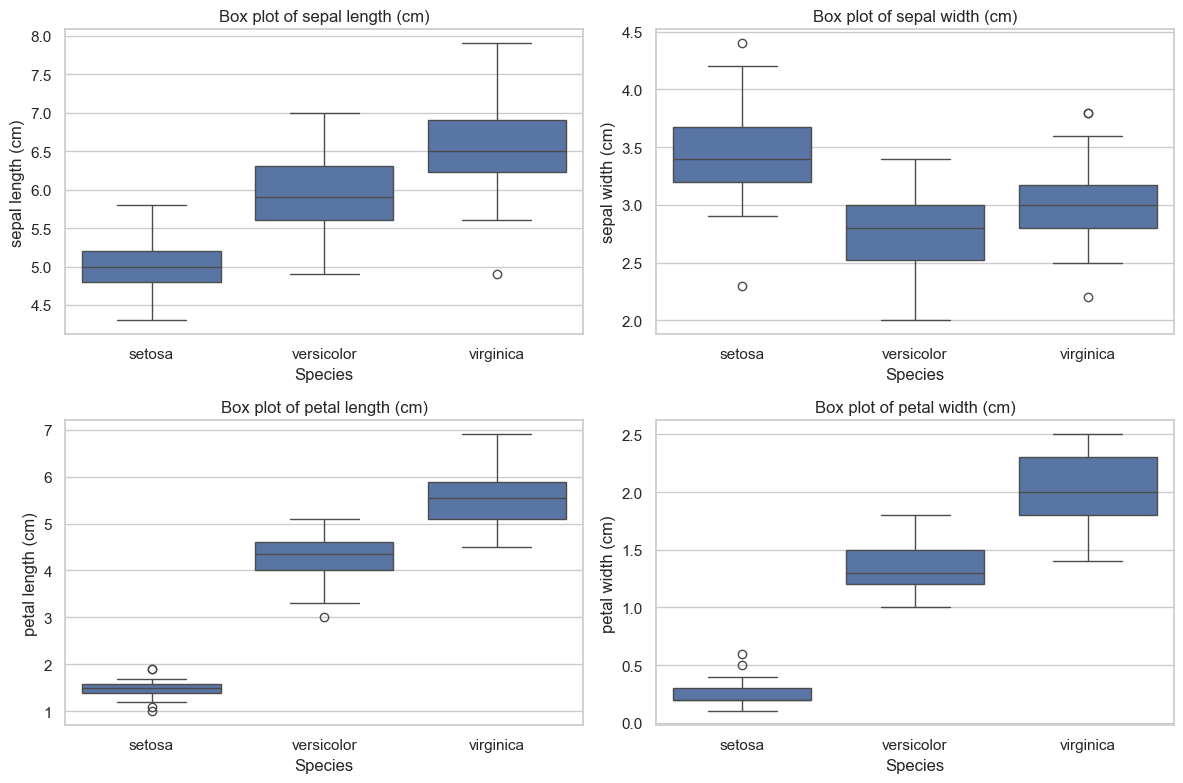

In [53]:
# Crea una figura e un array di assi con 2 righe e 2 colonne  
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  

# Appiattisci l'array di assi per un facile utilizzo in un ciclo  
axs = axs.ravel()  

# Genera un box plot per ogni feature  
for i in range(len(axs)):  
    sns.boxplot(x='species', y=df_data.columns[i], data=df_data, ax=axs[i])  
    axs[i].set_title(f'Box plot of {df_data.columns[i]}')  
    axs[i].set_xlabel('Species')  
    axs[i].set_ylabel(df_data.columns[i])  

# Aggiusta la spaziatura tra i grafici  
plt.tight_layout()  
plt.show()

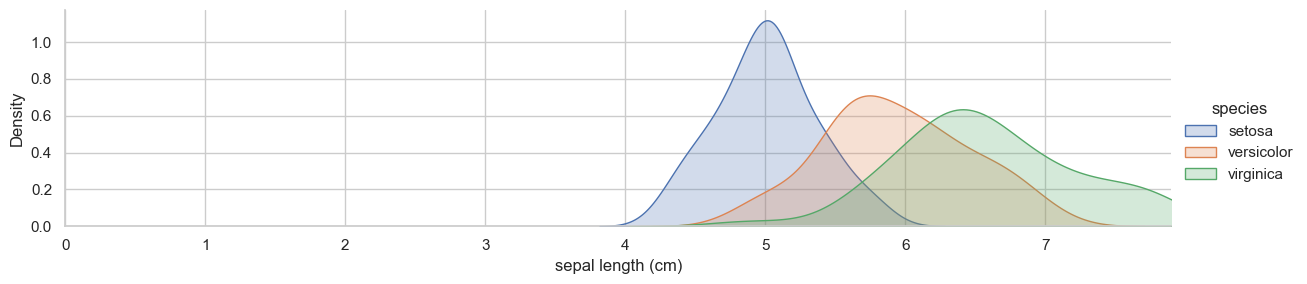

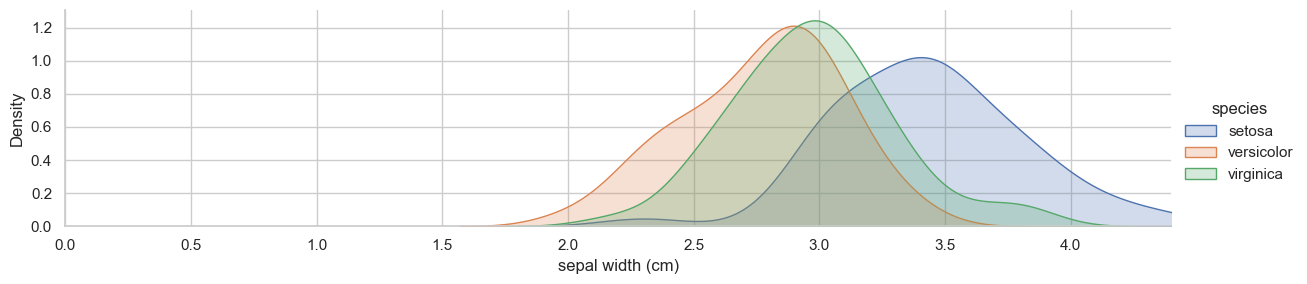

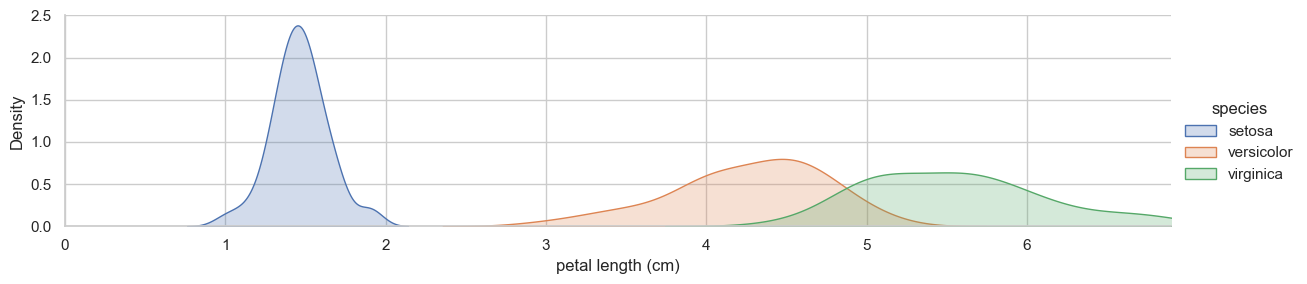

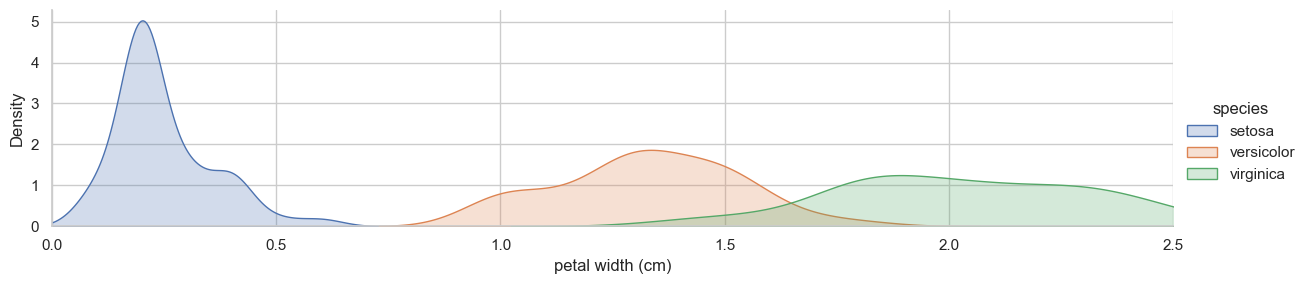

In [54]:
for i, column in enumerate(df_data_copy.columns):
    facet = sns.FacetGrid(df_data, hue="species",aspect=4)
    facet.map(sns.kdeplot,column,fill=True)
    facet.set(xlim=(0, df_data[column].max()))
    facet.add_legend()
plt.show()

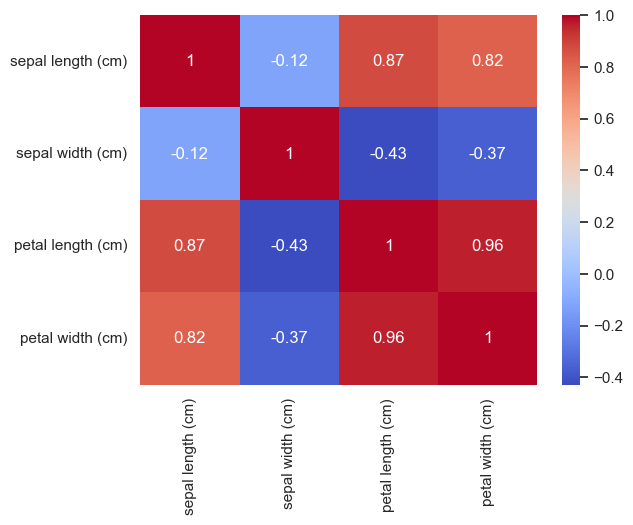

In [55]:
correlation_matrix = df_data_copy.corr()
# Creiamo l'heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Mostra il grafico
plt.show()

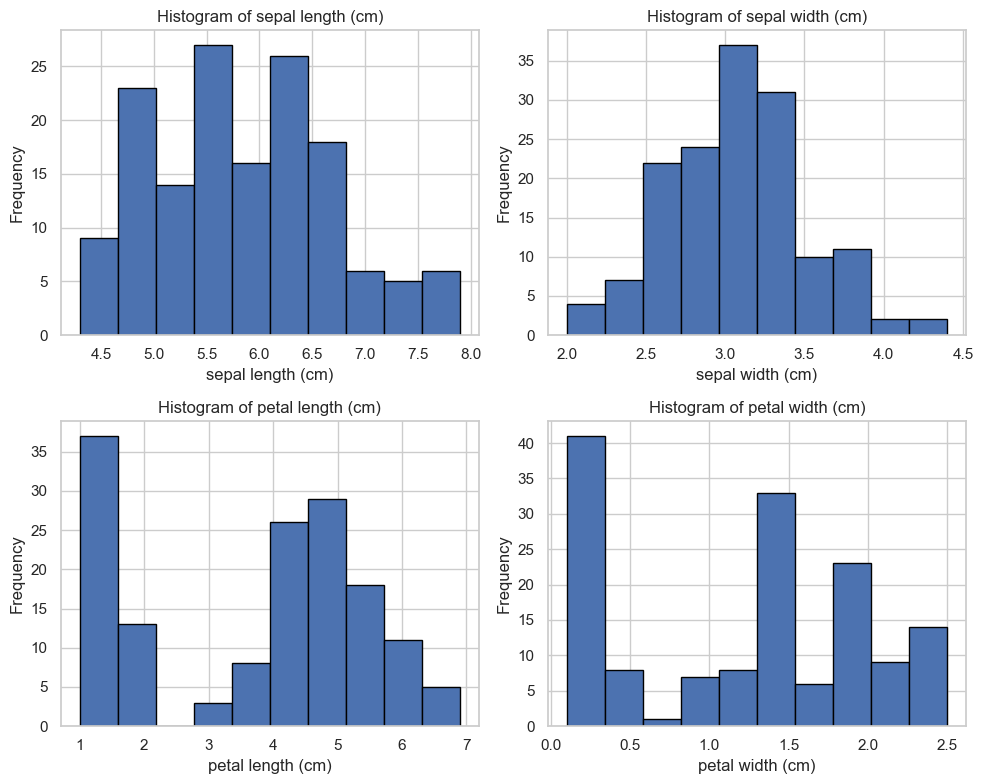

In [56]:
# Create a figure and an array of axes with 2 lines and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
bins = 10
# use ravel to simply the for loop
axs = axs.ravel()

# generate an histogram for each feature
for i in range(len(axs)):
    axs[i].hist(df_data_copy.iloc[:,i], bins=bins,edgecolor='black')
    axs[i].set_title(f'Histogram of {df_data_copy.columns[i]}')
    axs[i].set_xlabel(df_data_copy.columns[i])
    axs[i].set_ylabel('Frequency')

# fix spaces
plt.tight_layout()
plt.show()

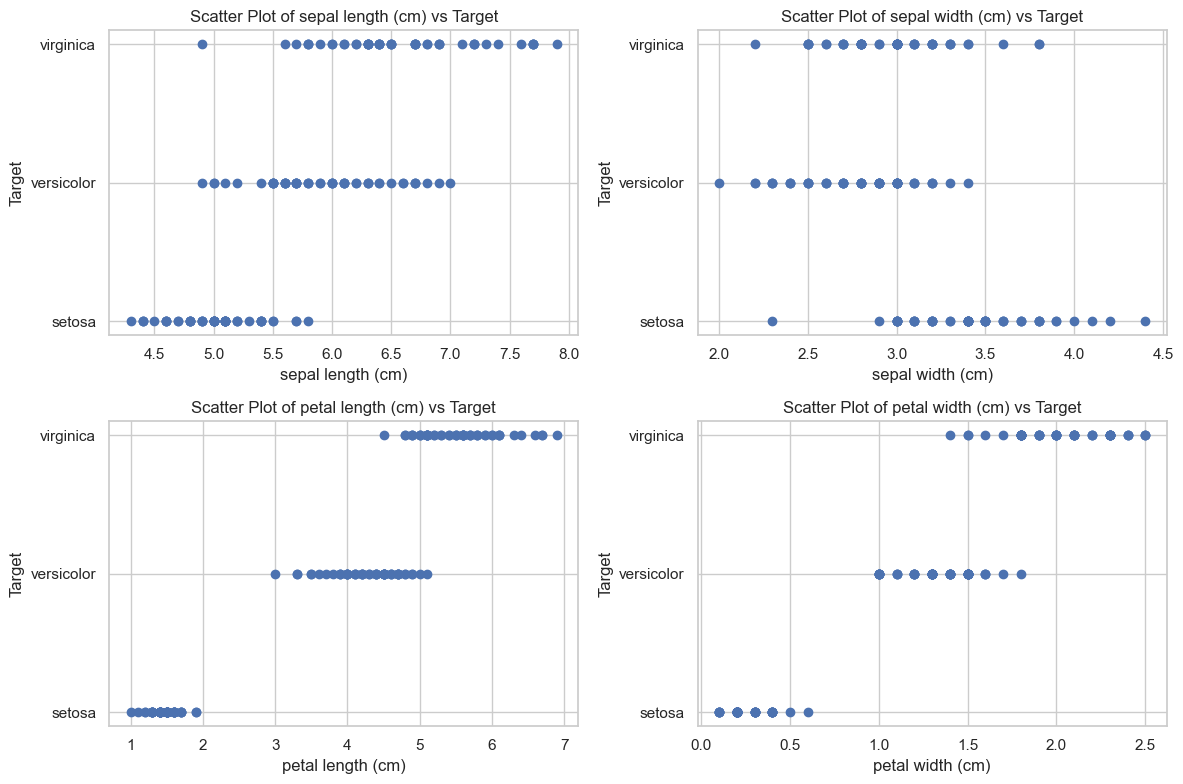

In [57]:
# Crea una figura e un array di assi con 2 righe e 2 colonne  
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  

# Appiattisci l'array di assi per un facile utilizzo in un ciclo  
axs = axs.ravel()  

# Genera un box plot per ogni feature  
for i, column in enumerate(df_data_copy.columns):  
    feature = df_data.columns[i]  
    axs[i].scatter(df_data[feature], df_data['species'])  
    axs[i].set_title(f'Scatter Plot of {feature} vs Target')  
    axs[i].set_xlabel(feature)  
    axs[i].set_ylabel('Target')  

# Aggiusta la spaziatura tra i grafici  
plt.tight_layout()  
plt.show() 

c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iva01\Desktop\prj\datasciencedummies\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

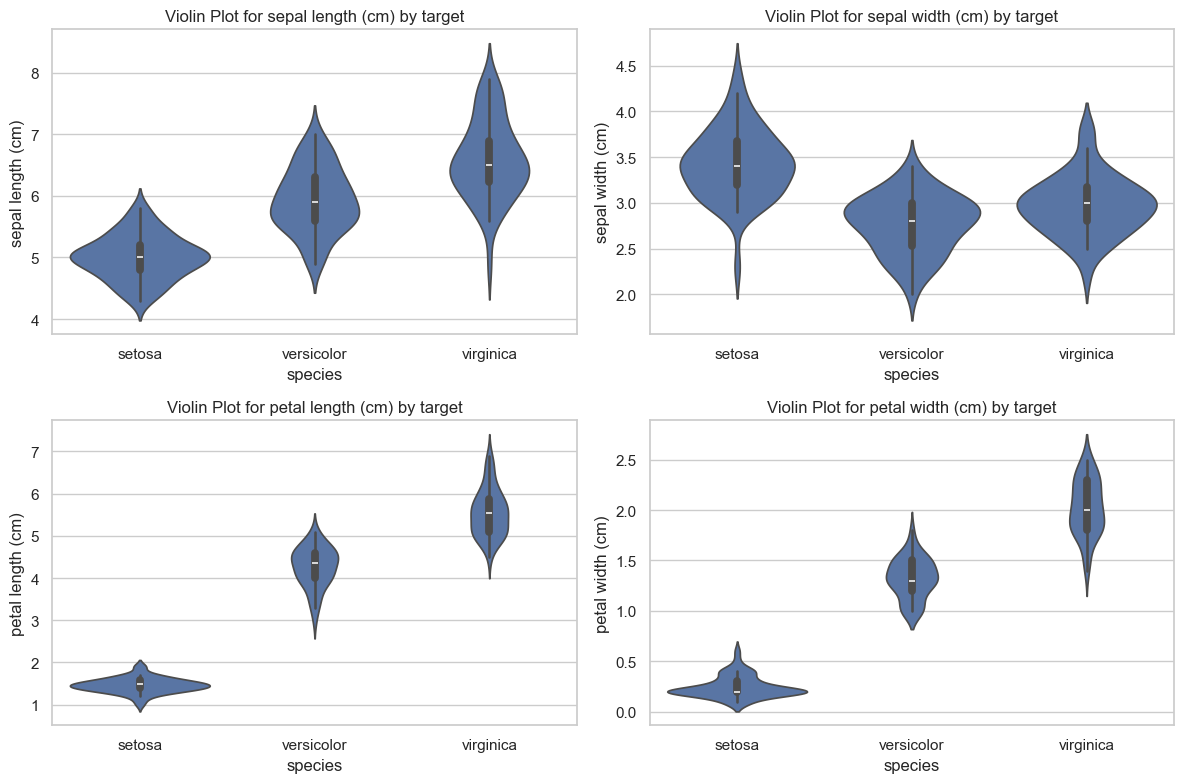

In [58]:
# Crea una figura e un array di assi con 2 righe e 2 colonne  
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  

# Appiattisci l'array di assi per un facile utilizzo in un ciclo  
axs = axs.ravel()  

# Genera un box plot per ogni feature  
for i, column in enumerate(df_data_copy.columns):  
    sns.violinplot(x='species', y=column, data=df_data, ax=axs[i])  
    axs[i].set_title(f'Violin Plot for {column} by target') 

# Aggiusta la spaziatura tra i grafici  
plt.tight_layout()  
plt.show() 